# レポート２(提出期限5/25)


**必ず名前と学籍番号を書くこと**

名前：

学籍番号：

## はじめに
問題１，問題２にある、課題１、課題２を解け。データの準備などは途中まで埋まっています。

## 問題１：クラスタリング
- くずし字のデータを取得して、クラス分類や、クラスタリングを行います。
- TSNEで学習したデータに対してクラスタリングを行うことをします。

In [17]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.4 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c03339e68b253b9a6a677ef598750d96607c90131c60ba3fbf4365fc285d5ea5
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


まずはデータを取得します。

In [18]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz -O kmnist-train-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz -O kmnist-train-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz -O kmnist-test-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz -O kmnist-test-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist_classmap.csv

--2022-05-17 20:30:21--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18384171 (18M)
Saving to: ‘kmnist-train-imgs.npz’

kmnist-train-imgs.n 100%[===================>]  17.53M  3.02MB/s    in 5.2s    

2022-05-17 20:30:26 (3.36 MB/s) - ‘kmnist-train-imgs.npz’ saved [18384171/18384171]

--2022-05-17 20:30:26--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29700 (29K)
Saving to: ‘kmnist-train-labels.npz’

kmnist-train-labels 100%[===================>]  29.00K  --.-KB/s    in 0.04s   

2022-05-17 20:30:26 (784 KB/s) - ‘kmnist-train-labels.npz’ saved [29700/29

正解ラベル(0,...9)に対応するひらがなを得ます。最初がindex=1から始まるのに注意です。

In [19]:
import numpy as np
names = np.loadtxt('kmnist_classmap.csv', dtype='str')
names

array(['index,codepoint,char', '0,U+304A,お', '1,U+304D,き', '2,U+3059,す',
       '3,U+3064,つ', '4,U+306A,な', '5,U+306F,は', '6,U+307E,ま',
       '7,U+3084,や', '8,U+308C,れ', '9,U+3092,を'], dtype='<U20')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#最初の5000だけ
train_images = np.load('kmnist-train-imgs.npz')['arr_0'][:5000]
train_labels = np.load('kmnist-train-labels.npz')['arr_0'][:5000]
test_images = np.load('kmnist-test-imgs.npz')['arr_0'][:5000]
test_labels = np.load('kmnist-test-labels.npz')['arr_0'][:5000]

train_imagesにどういうデータがあるかを確認します。

<Figure size 432x288 with 0 Axes>

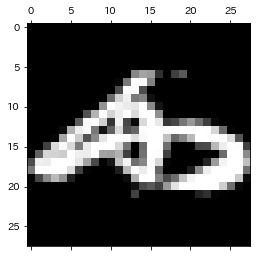

In [ ]:
plt.gray()
plt.matshow(train_images[1])

In [ ]:
train_data=train_images.reshape(-1, 784)
test_data=test_images.reshape(-1, 784)
train_data[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
train_images[1].shape

(28, 28)

In [ ]:
train_data[1].shape

(784,)

In [ ]:
train_images.shape

(60000, 28, 28)

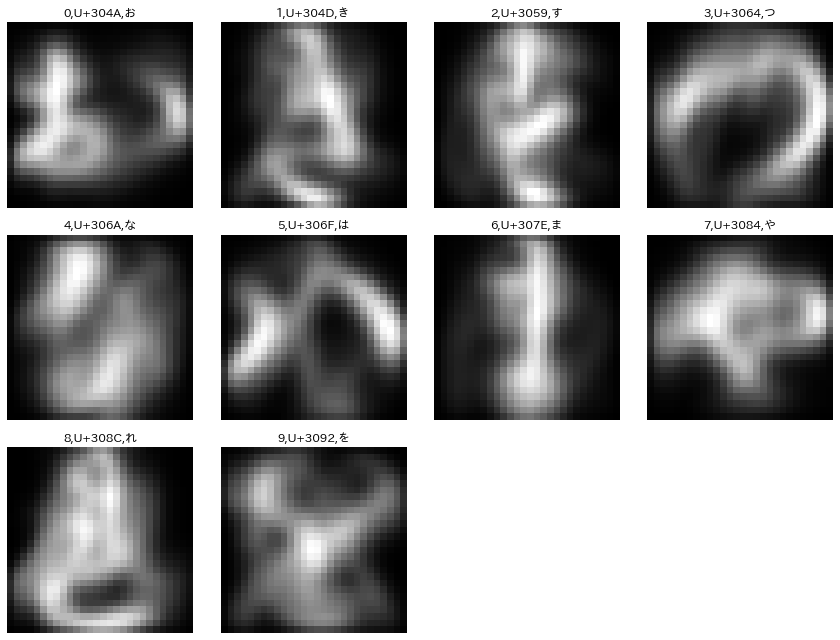

In [ ]:
# とりあえず平均をとってみます。

plt.figure(figsize=(12, 9))
for label in range(10):
    plt.subplot(3, 4, label + 1)
    indices = np.where(train_labels == label)
    mean_image = train_images[indices].mean(axis=0)
    plt.imshow(mean_image, cmap='gray')
    plt.title(names[label+1])
    plt.axis('off')
plt.tight_layout()

In [ ]:
import sklearn.neighbors
import sklearn.ensemble
import sklearn.metrics

clf_knn = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=4, weights='distance', n_jobs=7)
clf_knn.fit(train_data, train_labels)
y_pred = clf_knn.predict(test_data)

print(sklearn.metrics.accuracy_score(test_labels, y_pred))
print(sklearn.metrics.classification_report(test_labels, y_pred))
print(sklearn.metrics.confusion_matrix(test_labels, y_pred))


0.8174
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       516
           1       0.87      0.86      0.87       530
           2       0.75      0.80      0.78       495
           3       0.87      0.91      0.89       492
           4       0.88      0.76      0.81       513
           5       0.74      0.85      0.79       485
           6       0.71      0.89      0.79       506
           7       0.92      0.74      0.82       491
           8       0.72      0.87      0.79       504
           9       0.90      0.77      0.83       468

    accuracy                           0.82      5000
   macro avg       0.83      0.82      0.82      5000
weighted avg       0.83      0.82      0.82      5000

[[380   0   1   2   2  70   3  18  39   1]
 [  0 457  12   0   3   3  36   0  14   5]
 [  5   5 398  20   1   8  27   4  16  11]
 [  0   2  13 448   0  12  13   0   4   0]
 [  9  13  13  11 388  18  25   2  26   8]
 [  1   3  33   8  

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

projected = pca.fit_transform(train_data)
print(projected.shape)

(5000, 2)


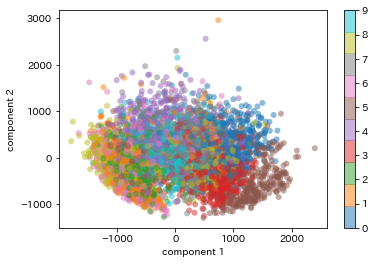

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=train_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

PCAの結果はイマイチ、、

そこでTSNEの実施

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


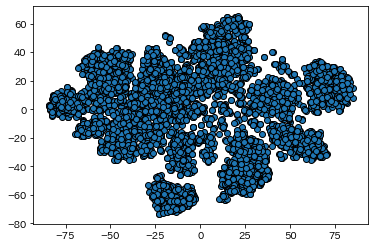

In [ ]:
from sklearn.manifold import TSNE
import sklearn.datasets
import seaborn as sns
import pandas as pd

digits2d = TSNE(n_components=2).fit_transform(train_data)

plt.scatter(digits2d[:,0], digits2d[:,1], edgecolors='k')

### 課題1：ここからが問題です。

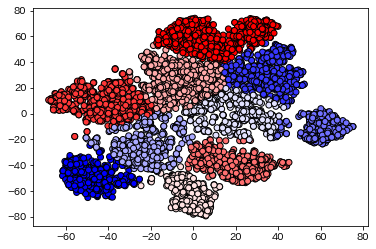

In [ ]:
## K平均法をつかってクラスタリングして結果を表示せよ
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import cm

#KMeanをつかう、lecture8_clustering.ipynb　を参考

#クラスタリングした結果を表示するための色付けのための予測
#y_train_est = kmeans.predict(digits2d)

#描画はこのようになるはず。
plt.scatter(digits2d[:,0], digits2d[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')

In [ ]:
# クラスタリングの結果と正解値を比較せよ

## 問題２　時系列予測

「イタリアへの外国旅行者のデータ」を使い、
時系列分析をせよ

SARIMAXのパラメータを、いくつか変更して、差を比較せよ。

パラメータのグリッドサーチチとAICを用いた最適解の探索例は載せいているので、これを参考に、パラメータと精度との傾向を分析し、

例えば、もっともダメなパラメータと、最良のパラメータの予測能力の比較を行う。



In [13]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd

#df = pd.read_table('tour_occ_arm__custom_2733010_page_tabular.tsv',header=None).T

url='https://raw.githubusercontent.com/miwamasa/DataScience2022/main/notebooks/data/tour_occ_arm__custom_2733010_page_tabular.tsv'
df = pd.read_table(url,header=None).T
df.columns = df.iloc[0]   
df.drop(0,inplace=True)  
df.columns=['date','value']
df['date'] = pd.to_datetime(df['date'])
df['value'] = df['value'].astype(int)
df = df[(df['date'] > '2012-01-01') & (df['date'] < '2019-10-01')]
df.set_index('date', inplace=True)
df

,value
date,
2012-02-01,4987763
2012-03-01,6591808
2012-04-01,8491590
2012-05-01,9303191
2012-06-01,12036853
...,...
2019-05-01,11443310
2019-06-01,15939946
2019-07-01,17391322


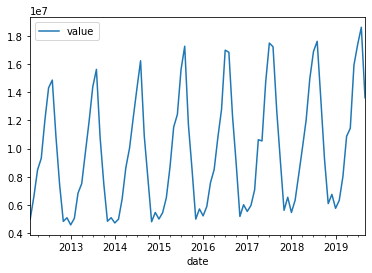

In [2]:
df.plot()

In [3]:
ts = df['value']
ts.tail()

date
2019-05-01    11443310
2019-06-01    15939946
2019-07-01    17391322
2019-08-01    18625929
2019-09-01    13616617
Name: value, dtype: int64

In [4]:
ts80=ts[:80]

プロットしてみる

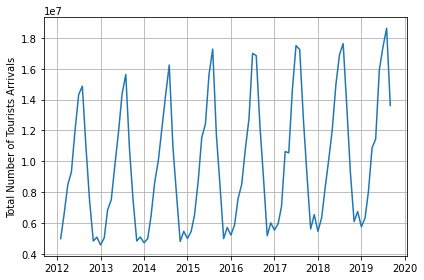

In [5]:
import matplotlib.pylab as plt
plt.plot(ts)
plt.ylabel('Total Number of Tourists Arrivals')
plt.grid()
plt.tight_layout()

定常性を検証する関数

In [6]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
        return True
    else:
        print("X is not stationary")
        return False

階差をとっていってどこで定常になるか

In [7]:
ts_diff = pd.Series(ts)
d = 0
while test_stationarity(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1

X is not stationary
X is stationary


In [8]:
d

1

定常になったかを確認

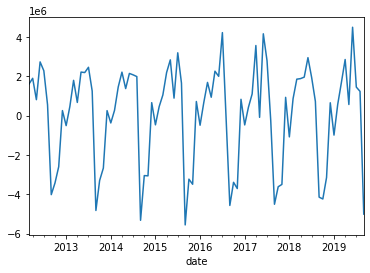

In [9]:
ts_diff.plot()

ACFとPAC

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


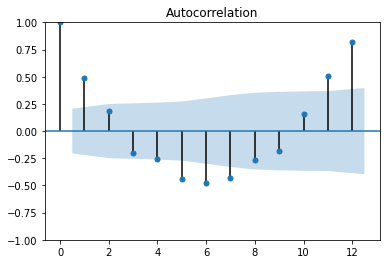

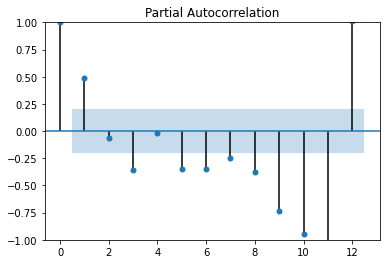

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_diff, lags =12)
plot_pacf(ts_diff, lags =12);

In [13]:
# 次数の推定
import statsmodels as sm
print(sm.tsa.stattools.arma_order_select_ic(ts_diff, max_ar=5, max_ma=5, ic='aic'))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

{'aic':              0            1            2            3            4  \
0  3263.368300  2925.838706  2912.244992  2916.674653  2900.815103   
1  2919.174034  2920.931042  2912.712647  2906.372792  2945.372869   
2  2920.490220  2913.350068  2879.328637  2905.679418  2980.474208   
3  2909.537476  2911.452926  2885.762550  2851.370528  2856.856695   
4  2911.499303  2907.297728  2883.445957  2893.810763  2866.548887   
5  2902.816110  2878.047206  2854.501285  2868.864552  2872.471261   

             5  
0  2908.872131  
1  2906.201997  
2  2905.029135  
3  2837.540468  
4  2848.328486  
5  2855.838948  , 'aic_min_order': (3, 5)}


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


とりあえず、p=3,q=5でARIMAでモデル化する

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 AIC: 2461.6523576929467, MSE: 82274466356425.11


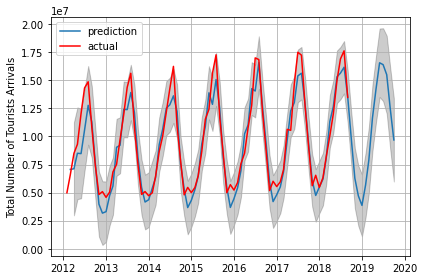

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

def mean_squared_error(y, t):
   return 0.5 * np.sum((y-t)**2)

p = 3
q = 5
model = SARIMAX(ts80, order=(p,d,q))
model_fit = model.fit()
    
fcast = model_fit.get_prediction(start=1, end=len(ts))
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()


plt.show()
plt.plot(ts_p,label='prediction')
plt.plot(ts80,color='red',label='actual')
plt.fill_between(ts_ci.index[1:],
                ts_ci.iloc[1:, 0],
                ts_ci.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel('Total Number of Tourists Arrivals')
plt.legend()
plt.tight_layout()
plt.grid()
print(' AIC: {}, MSE: {}'.format(model_fit.aic,mean_squared_error(ts_p,ts) ))

### 課題2：
　SARIMAを用いたモデルを作成し、予測し、ARIMAの結果と比較せよ。


以下は、グリッドサーチで、
SARIMA(p,d,q)(sp,sd,sq)[s]の次数の範囲を決めるという一例。

参考にしてもよい。



In [ ]:
import itertools

#SARIMA(p,d,q)(sp,sd,sq)[s]の次数の範囲を決める。
#範囲は計算量を減らすため、経験上、p,d,qを0～2、sp,sd,sqを0～1くらいに限定する。
p = q = range(0, 3)
sp = sd = sq = range(0, 2)

#グリッドサーチのために、p,q,sp,sd,sqの組み合わせのリストを作成する。
#定常性の確認よりd=1,周期sは決め打ちで12としている。
pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore") # warningsを表示させない

best_result = [0, 0, 10000000]
best_rmse = [0, 0, 100000000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
      try:
        # SARIMAXによりモデルを作成
            mod = SARIMAX(ts80,
                          order = param,
                          seasonal_order = param_seasonal)
         #ここはあえて、空白にしています。
         #当てはめ
         #予測
         #  fcast.predicted_mean
         # RMSEを計算
            
            print('order{}, s_order{} - AIC: {} - RMSE: {}'.format(param, param_seasonal, results.aic,rmse ))
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
            if rmse < best_rmse[2]:
               best_rmse = [param, param_seasonal, rmse]
      except:
        continue

print('AICが最も良いモデル：', best_result)
print('RMSEが最も良いモデル：', best_rmse)

結果の確認の例、SARIMAXのパラメータは、各自の試行で得られたものを使う。

 AIC: 2494.768207317482


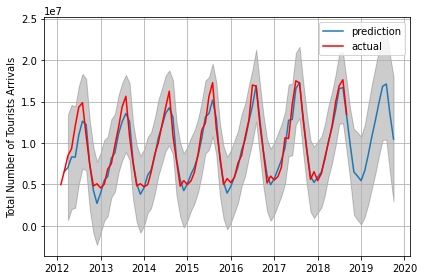

In [ ]:
model = SARIMAX(ts80, order=(2,1,2),seasonal_order=(1,0,1,12))
model_fit = model.fit(disp=1,solver='powell')
    
fcast = model_fit.get_prediction(start=1, end=len(ts))
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()


plt.show()
plt.plot(ts_p,label='prediction')
plt.plot(ts80,color='red',label='actual')
plt.fill_between(ts_ci.index[1:],
                ts_ci.iloc[1:, 0],
                ts_ci.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel('Total Number of Tourists Arrivals')
plt.legend()
plt.tight_layout()
plt.grid()
print(' AIC: {}'.format(model_fit.aic))

In [ ]:
plt.hist(ts_p-ts)